# Jamboree Education
- Jamboree has established a reputation for helping students excel in standardized tests such as GMAT, GRE, and SAT through unique problem-solving methods.
- The new feature focuses on simplifying decision-making for students by providing a data-driven probability score for Ivy League admissions, targeting Indian aspirants.

# Objective of the case study
- To analyze and enhance the newly launched Ivy League admission predictor feature on Jamboree’s website. 
- The tool estimates a student's probability of getting into an Ivy League college based on their academic and extracurricular credentials.

# Approach
- Basic Data Analysis
- Exploratory Data Analysis
    - Univariate, Bivariate, Multivariate Analysis
    - Target vs Features
- Statistical Tests
    - Chisquare, Anova Test
- Data Preprocessing
- Modeling

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
bold_start = '\033[1m'
bold_end = '\033[0m'

In [5]:
#Load Dataset
path = r"F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\Jamboree\Dataset"
path = r"E:\Nextstep\Scaler\Business-Case-Study\Jamboree\Dataset"
raw_df = pd.read_csv(path + "\Jamboree_Admission.csv")
raw_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Data Analysis

In [6]:
#Statistics of Dataset
raw_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Inference:
- **Serial No.**: Unique values
- **GRE Score**: 
    - Ranges from 290 to 340
    - Mean ~= Median
- **TOEFL Score**: 
    - Ranges from 92 to 120
    - Mean ~= Median
- **University Rating**: 
    - Ranges from 1 to 5
    - Discrete values (Categorical)
- **SOP**: `Statement of Purpose`
    - Ranges from 1 to 5
- **LOR**: `Letter of Recommendation`
    - Ranges from 1 to 5
- **CGPA**: `Cumulative Grade Point Average`
    - Ranges from 6.8 to 9.92
- **Research**: `Experience in Research`
    - Binary Feature
- **Change of Admit**: `Probability of getting Admission`
    - Ranges from 0 to 1   

In [7]:
#Characteristics of Dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Inference:
- **No Null Values** in the dataset
- **All are numerical** variables

In [8]:
raw_df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

### Inference:
- All unique values in Serial No.
- Discrete Variables: **University Rating**, **SOP**, **LOR**, Research
- Continuous Variables: **GRE Score**, **TOEFL Score**, **CGPA**, **Chance of Admit**

# Exploratory Data Analysis
- Univariate Analysis
    - Categorical: *Frequency and Proportion Plots*
    - Numerical: *Distribution and Box plots*
    - *Skewness and Kurtosis*
- Bivariate Analysis
- Multivariate Analysis

## Univariate Analysis

In [9]:
def univariate_plot(df, feature):
    plt.figure(figsize=(12,4))   
    if df[feature].nunique() < 10:
        # Categorical Feature 
        plt.suptitle('Univariate Analysis of ' + feature + ": Frequency and Proportion")
        plt.subplot(1,2,1)
        sns.countplot(data=df, x=feature) 
        plt.subplot(1,2,2)
        labels = df[feature].value_counts().index
        plt.pie(x=list(df[feature].value_counts()), labels=list(labels), autopct="%0.2f")        
        plt.show()
    else:
        # Numerical Feature
        plt.suptitle('Univariate Analysis of ' + feature + ": Distribution and Box Plot")
        plt.subplot(1,2,1)
        sns.histplot(df[feature], kde=True, bins=20)
        plt.subplot(1,2,2)
        sns.boxplot(df[feature])
        plt.xlabel(feature)

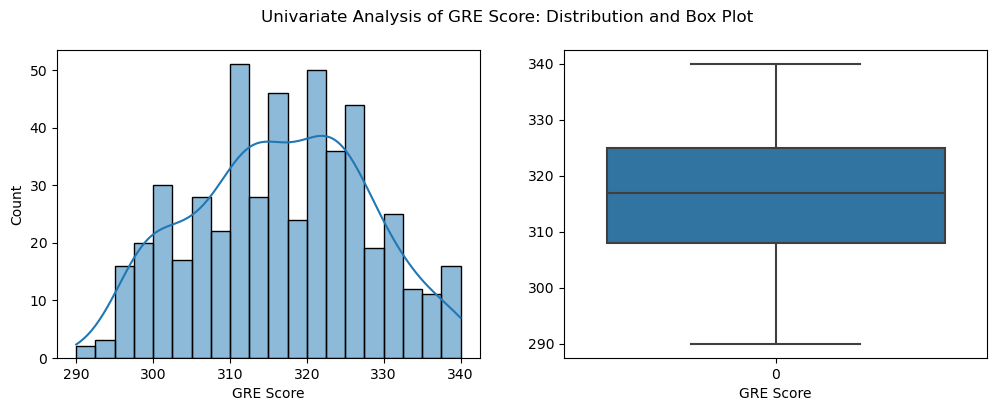

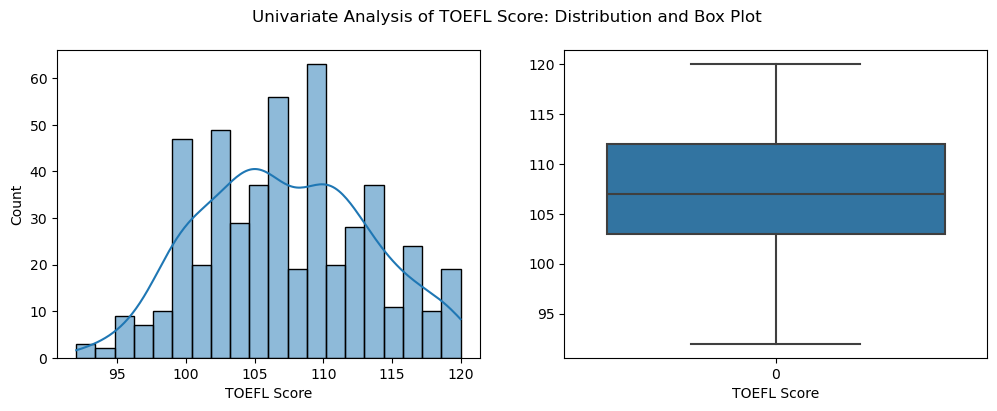

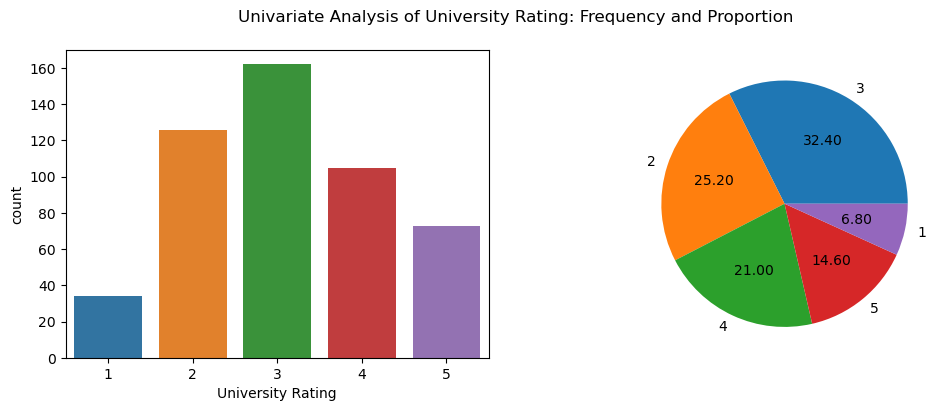

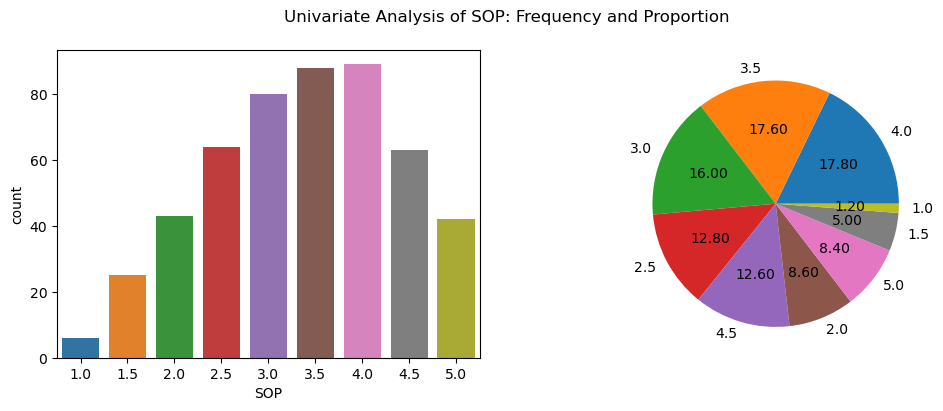

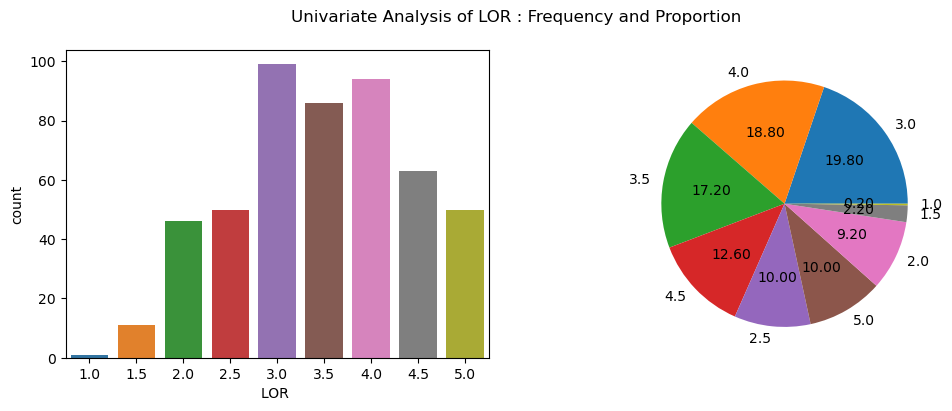

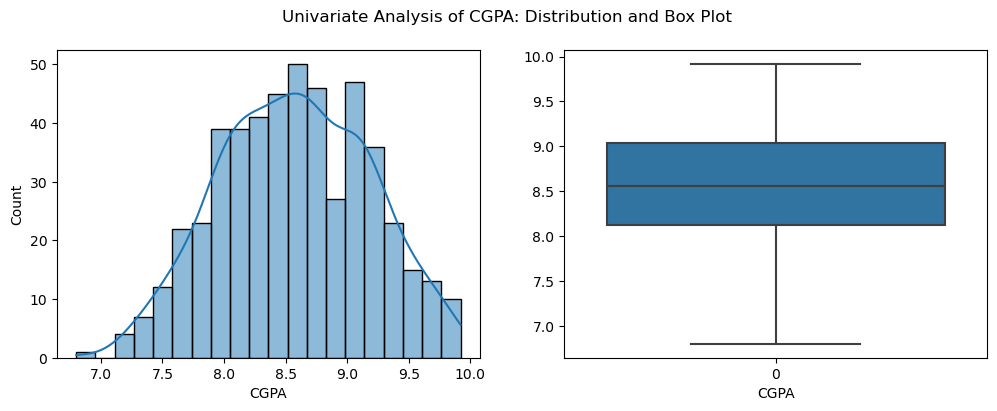

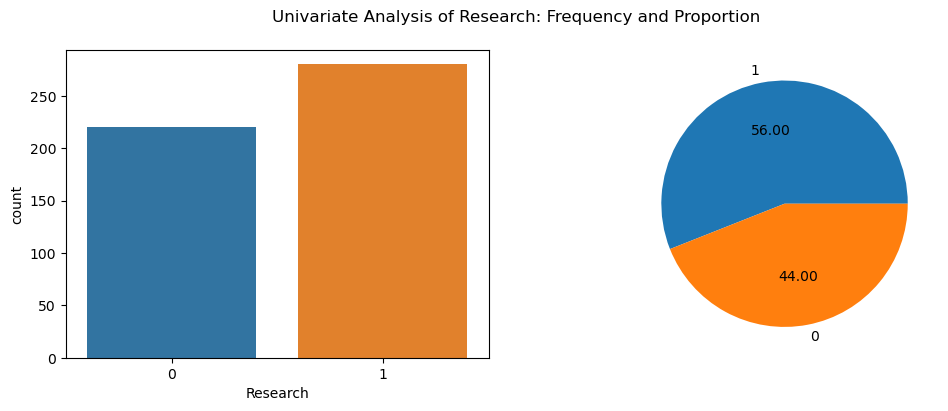

In [10]:
features = list(raw_df.columns)[1:-1]
for feature_name in features:
    univariate_plot(raw_df, feature_name)

### Inference:
- GRE Score, TOEFL Score:
    - Data lies between inter quartile range (IQR), hence outliers doesn't exist
    - Normally distributed and spread out or flat peak
    - No missing range in the data as there are no gaps observed
- CGPA:
    - Data lies between inter quartile range (IQR), hence outliers doesn't exist
    - Normally distributed and sharp peak
    - Gap between 7 and 7.5 indicating the missing range in the data
- University Rating:
    - Ratings in the range 2-4 being 80% of proportion
    - Average rating (3) being the top most
- SOP Strength:
    - Strength in the range 2.5-4.5 being 80% of proportion
    - Average Strength (3.5 and 4.5) being the top most  
    - Lowest strength is neglegible (1.2%)
- LOR Strength:
    - Strength in the range 3-4 being ~60% of proportion
    - Average Strength (3) being the top most
    - Lowest strength is neglegible (0.2%)
- Research:
    - Almost equally distributed

In [11]:
skew_list = []
kurt_list = []
for feature in features:
    skew_list.append(np.round(skew(raw_df[feature]),2))
    kurt_list.append(np.round(kurtosis(raw_df[feature]),2))
pd.DataFrame(data=[skew_list, kurt_list], index = ['Skew', 'Kurtosis'], columns=features)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Skew,-0.04,0.10,0.09,-0.23,-0.14,-0.03,-0.24
Kurtosis,-0.72,-0.66,-0.81,-0.71,-0.75,-0.57,-1.94


### Inference:
- **GRE score** and **CGPA** are almost **symmetric**
- **TOEFL Score and University Rating** are slightly **right skewed** indicating the minimal outliers on the right side 
- **SOP, LOR and Research** are **left skewed** indicating the presence of outliers on the left side 

## Bivariate Analysis
- Categorical Vs Categorical Feature
- Numerical Vs Numerical Feature
- Categorical Vs Numerical Feature

In [12]:
num_features = [feature for feature in features if raw_df[feature].nunique() > 10]
cat_features = [feature for feature in features if raw_df[feature].nunique() <= 10]

### Categorical Feature Analysis

In [13]:
def bivariateplot1xn(df, cat_features, plot_feature):
    plt.figure(figsize=(12,4))
    n = len(cat_features)-1
    plt_count = 1
    for feature in cat_features:
        if plot_feature != feature:
            plt.suptitle(plot_feature + " vs Other features")
            plt.subplot(1,n,plt_count)
            sns.countplot(data=df[cat_features], x=feature, hue=plot_feature)
            plt_count += 1

AttributeError: 'numpy.int64' object has no attribute 'startswith'

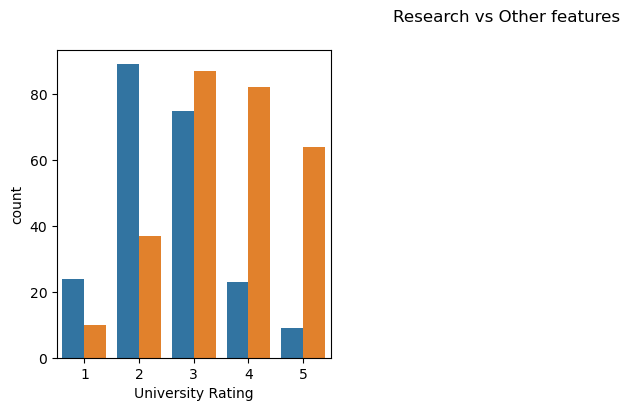

In [14]:
bivariateplot1xn(raw_df, cat_features, 'Research')

#### Inference:
- Students from universities with higher ratings (3+) are more likely to have research experience
- Students having research experience are more likely to have higher SOP and LOR strengths (3+)

<Axes: xlabel='LOR ', ylabel='University Rating'>

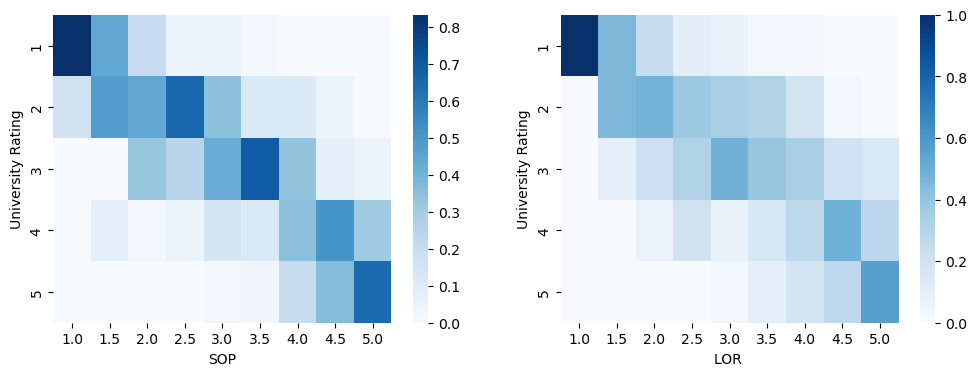

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ct = pd.crosstab(raw_df['University Rating'], raw_df['SOP'], normalize='columns')
sns.heatmap(ct, cmap='Blues')
plt.subplot(1,2,2)
ct = pd.crosstab(raw_df['University Rating'], raw_df['LOR '], normalize='columns')
sns.heatmap(ct, cmap='Blues')

<Axes: xlabel='LOR ', ylabel='SOP'>

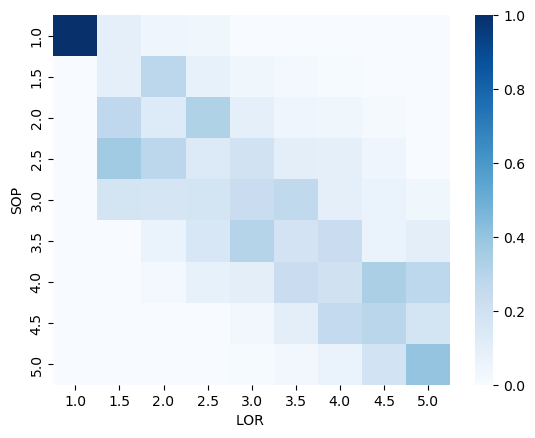

In [16]:
ct = pd.crosstab(raw_df['SOP'], raw_df['LOR '], normalize='columns')
sns.heatmap(ct, cmap='Blues')

#### Inference:
- Diagonal elements indicate a strength of relationship between the categorical features
- Strength of relationship: 
    - (University rating and SOP) > (University rating and LOR) > (SOP and LOR)

### Numerical Feature Analysis

<Figure size 1200x400 with 0 Axes>

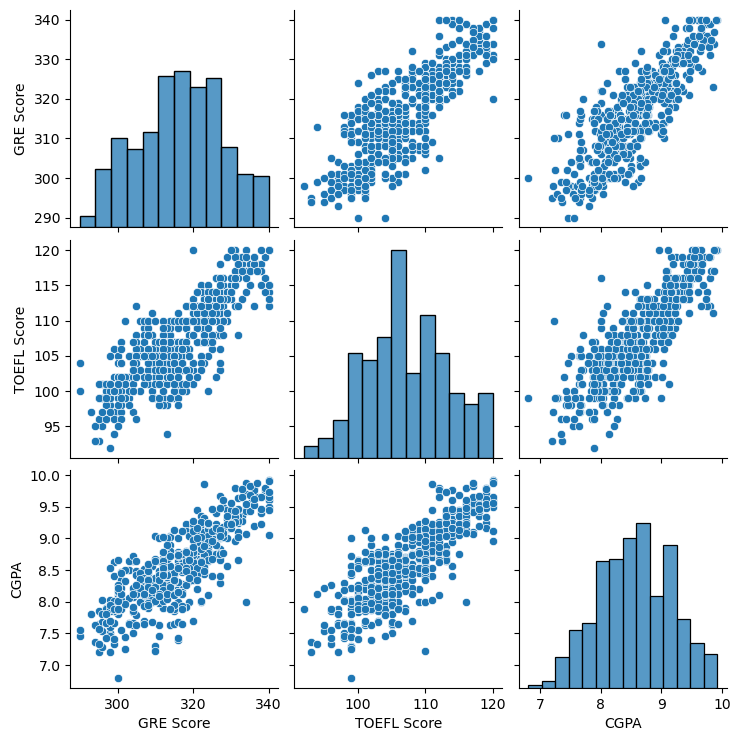

In [17]:
plt.figure(figsize=(12,4))
sns.pairplot(raw_df[num_features])

#### Inference:
- All 3 numerical features are highly linearly correlated
- Students having high CGPA are more likely to have higher GRE and TOEFL Score

### Categorical Vs Numerical Features

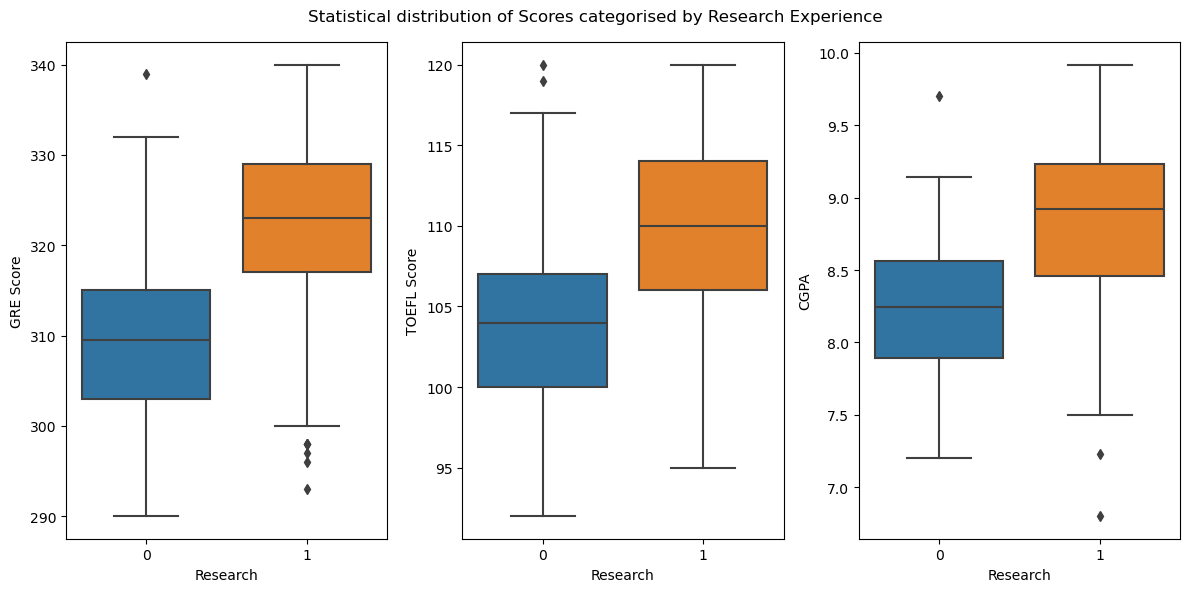

In [18]:
#Research Experience Vs Numerical Features
plt.figure(figsize=(12,6))
plt.suptitle('Statistical distribution of Scores categorised by Research Experience')
plt.subplot(1,3,1)
sns.boxplot(data=raw_df, y= 'GRE Score', x='Research')
plt.subplot(1,3,2)
sns.boxplot(data=raw_df, y= 'TOEFL Score', x='Research')
plt.subplot(1,3,3)
sns.boxplot(data=raw_df, y= 'CGPA', x='Research')
plt.tight_layout()

#### Inference:
- Students having research experience are mostly likely to get higher scores in GRE, TOEFL and Curriculum
- Very few outliers are observed indicating the need for outlier treatment on the dataset

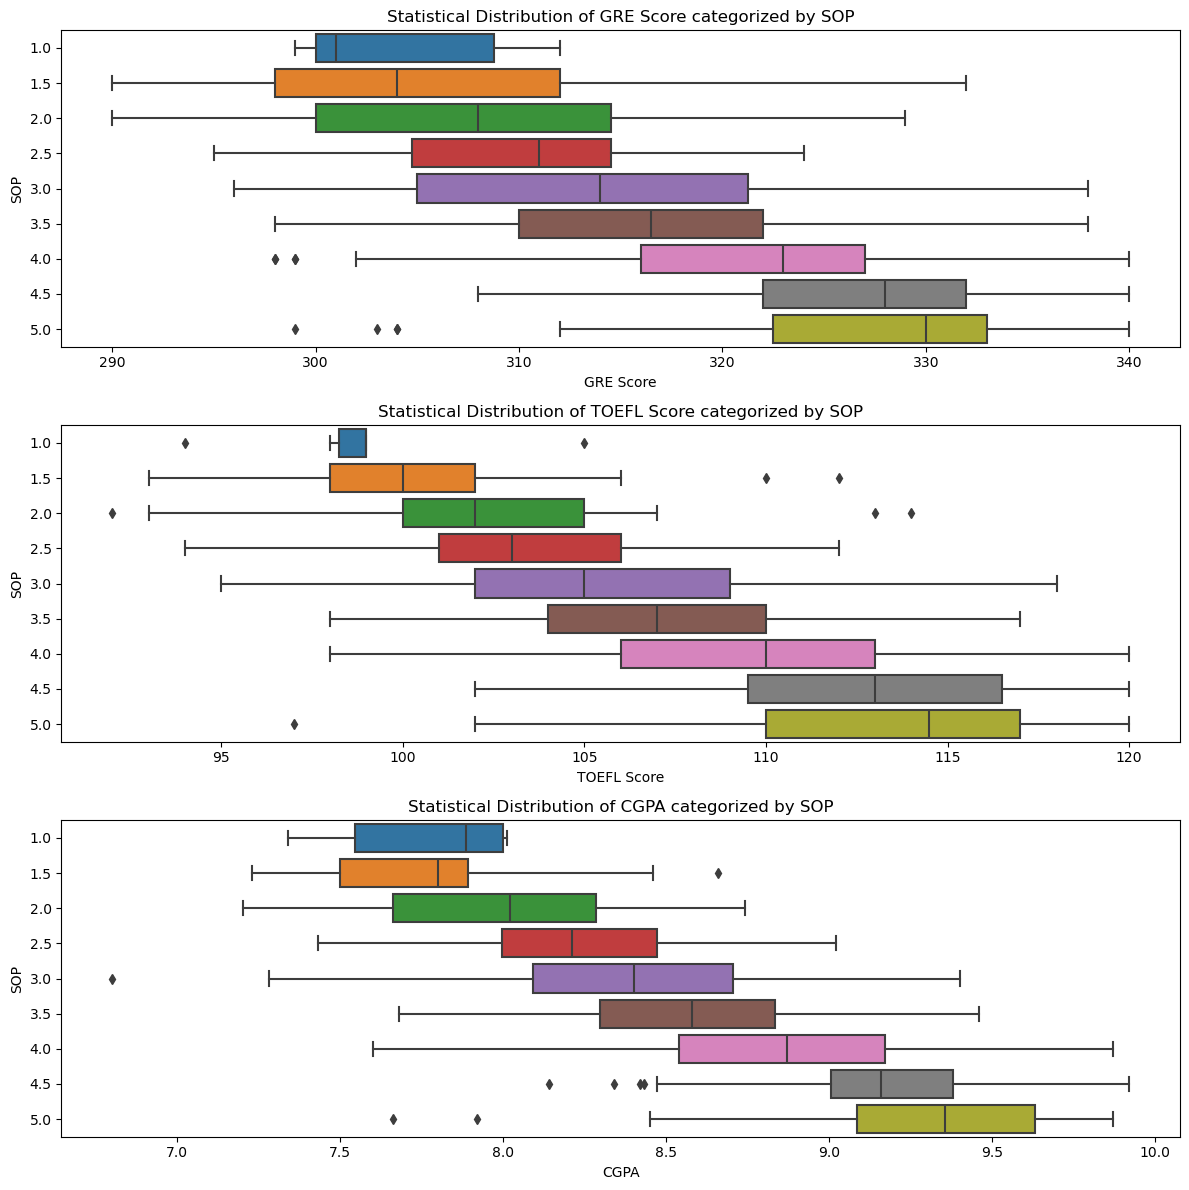

In [19]:
#SOP Vs Numerical Features
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
sns.boxplot(data=raw_df, x= 'GRE Score', y='SOP', orient='h')
plt.title("Statistical Distribution of GRE Score categorized by SOP")
plt.subplot(3,1,2)
sns.boxplot(data=raw_df, x= 'TOEFL Score', y='SOP', orient='h')
plt.title("Statistical Distribution of TOEFL Score categorized by SOP")
plt.subplot(3,1,3)
sns.boxplot(data=raw_df, x= 'CGPA', y='SOP', orient='h')
plt.title("Statistical Distribution of CGPA categorized by SOP")
plt.tight_layout()

#### Inference:
- Clear trend is evident between SOP and Scores
- Students scored more in the GRE, TOEFL and Curriculum are having higher SOP strength

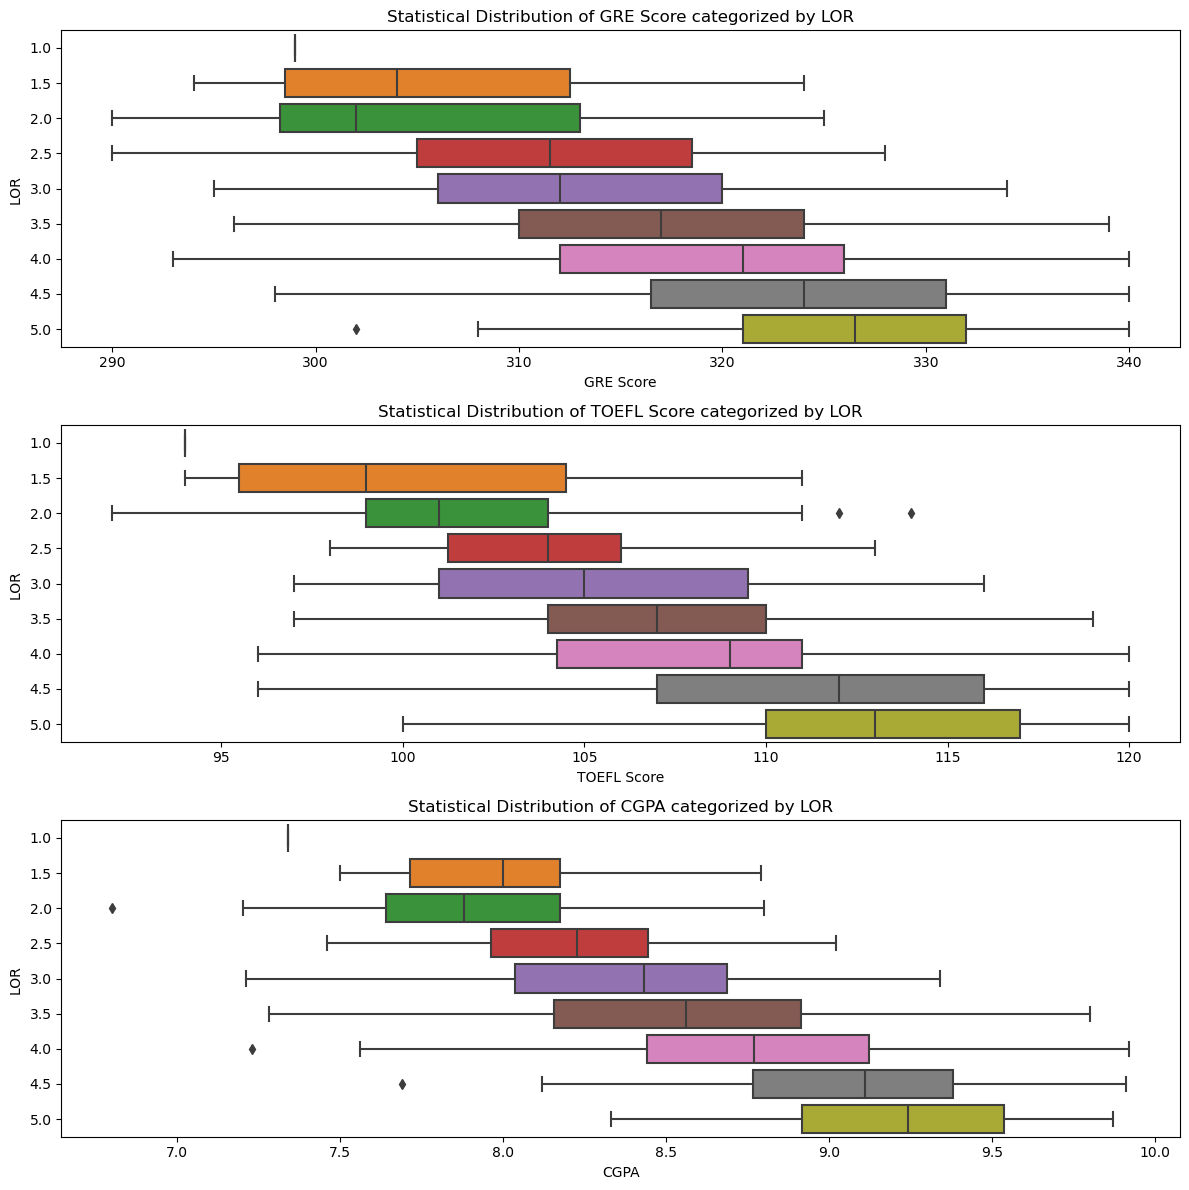

In [20]:
#LOR Vs Numerical Features
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
sns.boxplot(data=raw_df, x= 'GRE Score', y='LOR ', orient='h')
plt.title("Statistical Distribution of GRE Score categorized by LOR")
plt.subplot(3,1,2)
sns.boxplot(data=raw_df, x= 'TOEFL Score', y='LOR ', orient='h')
plt.title("Statistical Distribution of TOEFL Score categorized by LOR")
plt.subplot(3,1,3)
sns.boxplot(data=raw_df, x= 'CGPA', y='LOR ', orient='h')
plt.title("Statistical Distribution of CGPA categorized by LOR")
plt.tight_layout()

#### Inference:
- Clear trend is evident between LOP and Scores
- Students scored more in the GRE, TOEFL and Curriculum are having higher LOR strength
- Grouping the categories can provide more insights

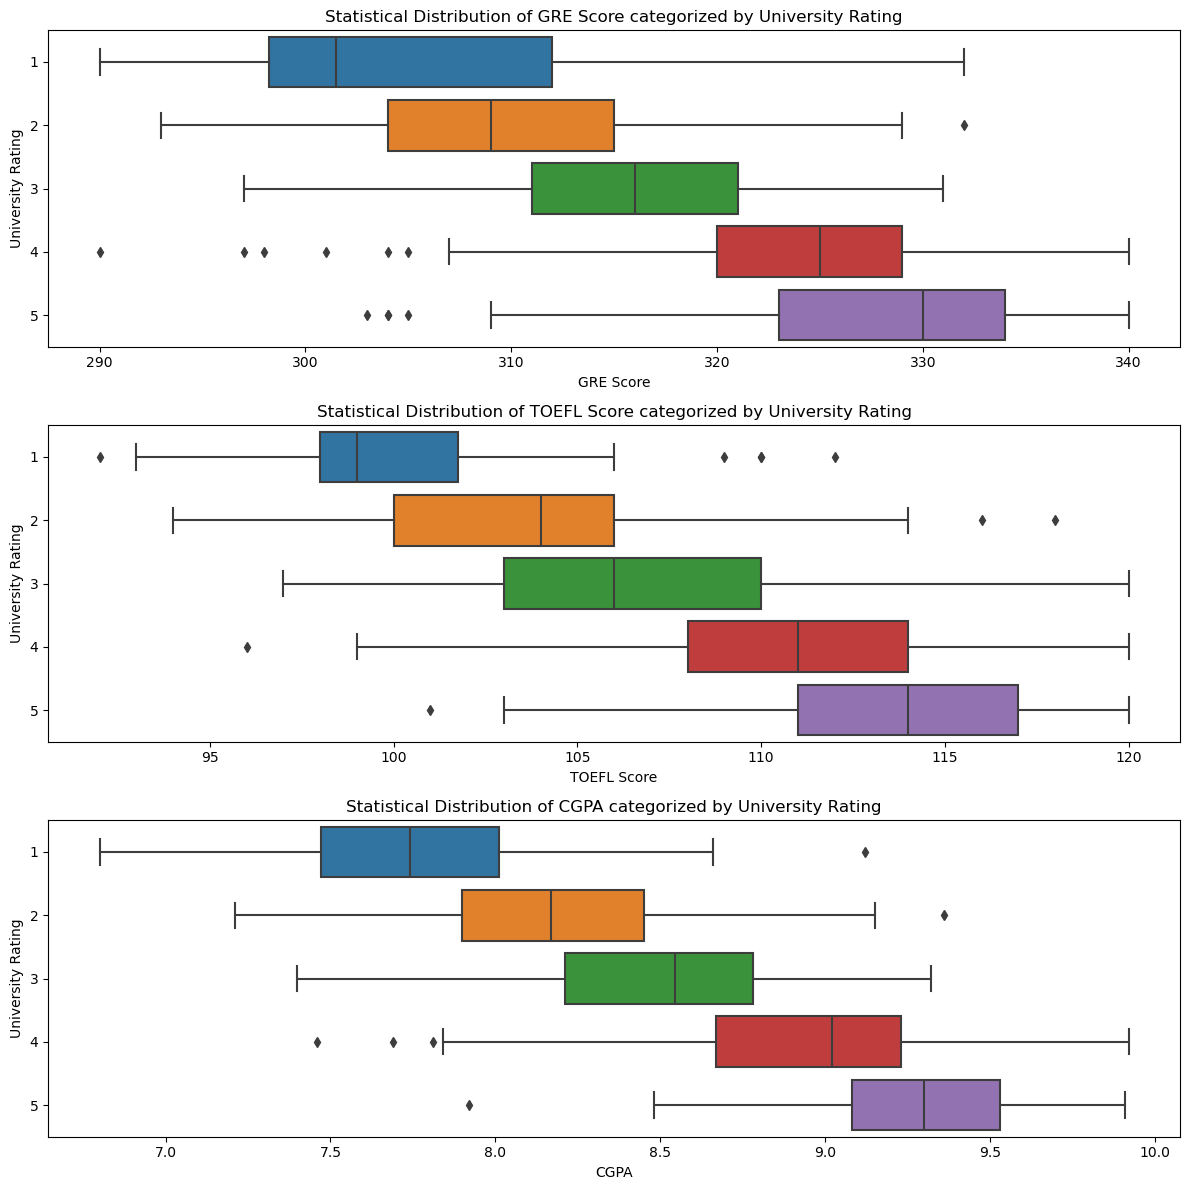

In [21]:
#University Rating Vs Numerical Features
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
sns.boxplot(data=raw_df, x= 'GRE Score', y='University Rating', orient='h')
plt.title("Statistical Distribution of GRE Score categorized by University Rating")
plt.subplot(3,1,2)
sns.boxplot(data=raw_df, x= 'TOEFL Score', y='University Rating', orient='h')
plt.title("Statistical Distribution of TOEFL Score categorized by University Rating")
plt.subplot(3,1,3)
sns.boxplot(data=raw_df, x= 'CGPA', y='University Rating', orient='h')
plt.title("Statistical Distribution of CGPA categorized by University Rating")
plt.tight_layout()

#### Inference:
- Clear steep trend is evident between University Rating and Scores
- Students scored more in the GRE, TOEFL and Curriculum are from highly rated universities
- Grouping the categories can provide more insights

## Multivariate Analysis
- All 3 Numerical Feature
- 1 Numerical vs 3 Categorical Feature  (Binned)

In [22]:
df = raw_df.copy()
df['UR_Binned'] = pd.cut(df['University Rating'], bins = [0,2,3,5], labels=['Low', 'Average', 'High'])
df['SOP_Binned'] = pd.cut(df['SOP'], bins = [0,2,3.5,5], labels=['Low', 'Average', 'High'])
df['LOR_Binned'] = pd.cut(df['LOR '], bins = [0,2,3.5,5], labels=['Low', 'Average', 'High'])

<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

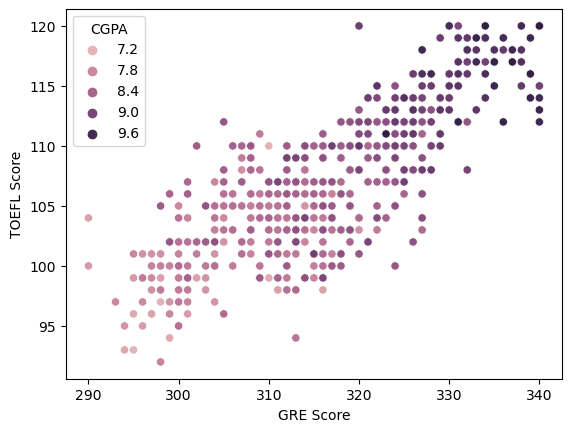

In [23]:
sns.scatterplot(data = df, x = 'GRE Score', y = 'TOEFL Score', hue='CGPA')

## Target Variable Analysis
- UVA of Target 
- BVA with each numerical and categorical features
- Target correlation with Features

### UVA - Target (Chance of Admit)

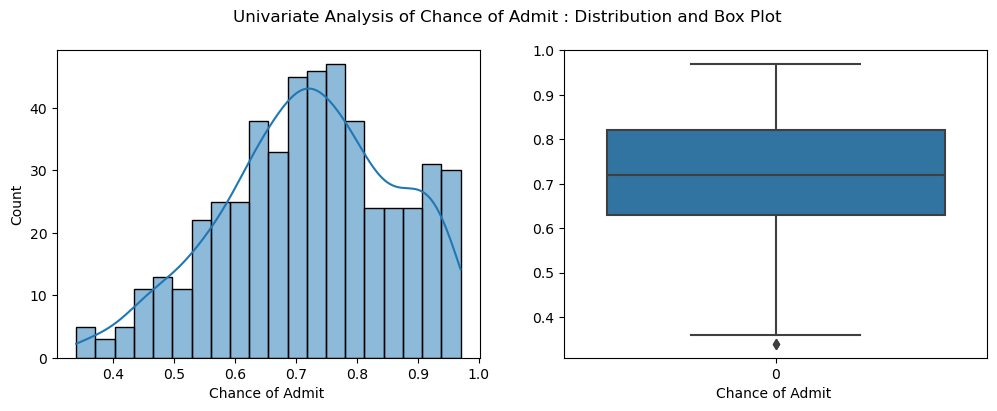

In [24]:
univariate_plot(raw_df, 'Chance of Admit ')

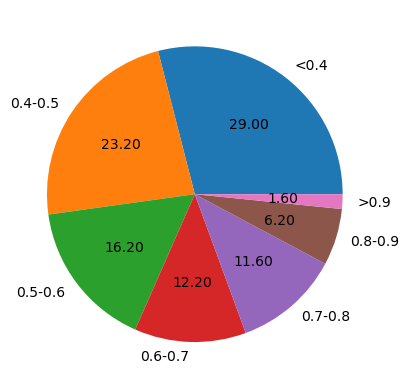

In [25]:
labels = ["<0.4", "0.4-0.5", "0.5-0.6", "0.6-0.7", "0.7-0.8", "0.8-0.9", ">0.9"]
target = pd.cut(raw_df['Chance of Admit '], bins=[0, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], labels=labels)
plt.pie(x=list(target.value_counts()), labels=labels, autopct="%0.2f") 
plt.show()

#### Inference:
- Unbalanced dataset with relatively left skewed
- Median is around 0.7
- High confidence results (>0.7) are less <25%
- 0.4 to 0.7 confidence range occupies 50% of dataset

### BVA - Target vs Features

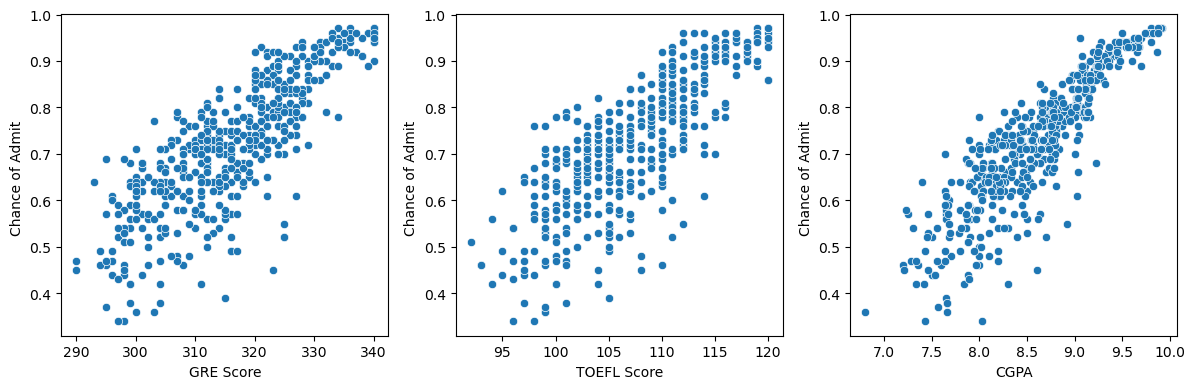

In [26]:
plt.figure(figsize=(12, 4))
for i in range(len(num_features)):
    plt.subplot(1,3,i+1)
    sns.scatterplot(x=raw_df[num_features[i]], y = raw_df['Chance of Admit '])
plt.tight_layout()

#### Inference:
- GRE Score, TOEFL Score and CGPA all are linearly correlated with Chance of Admission
- Variance of TOEFL Score > GRE Score > CGPA
- In other words, the range of toefl score is braod for getting an admission 
- Higher the score the higher chance of getting an admission

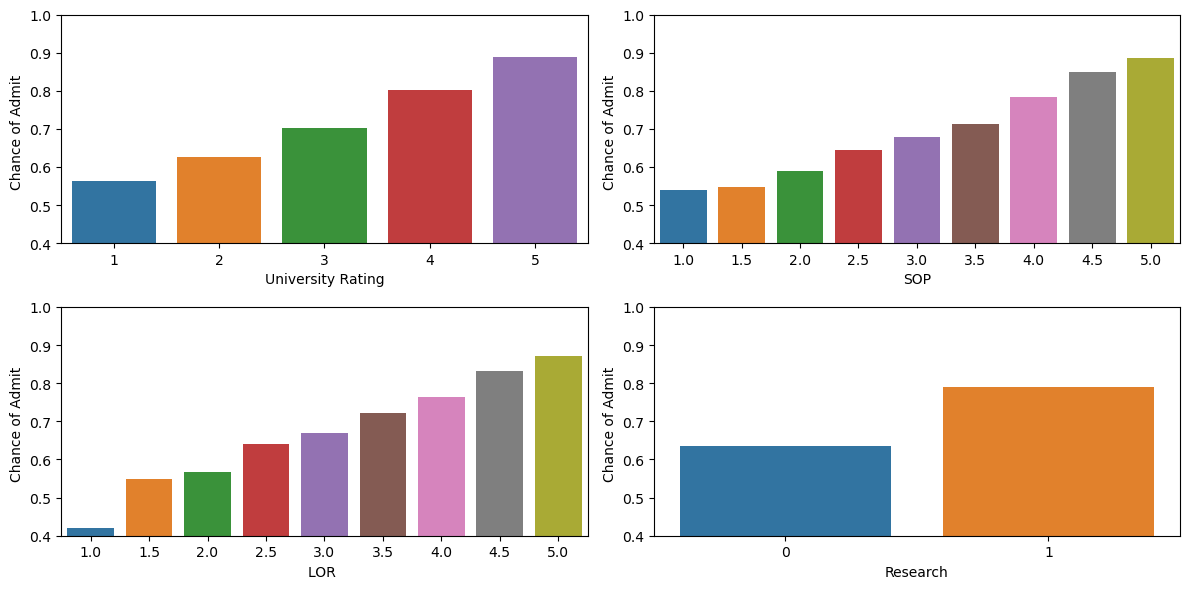

In [27]:
plt.figure(figsize=(12, 6))
for i in range(len(cat_features)):
    plt.subplot(2,2,i+1)
    sns.barplot(data = raw_df, x = cat_features[i], y = 'Chance of Admit ', estimator='mean', errorbar=None)
    plt.ylim(0.4, 1)
plt.tight_layout()

#### Inference:
- University rating, SOP, LOR and Research experience are positively and linearly correlated with Chance of Admission
- Higher the rating the higher the chance of getting an admission

### Feature Correlation with Target

(0.4, 0.9265332036498027)

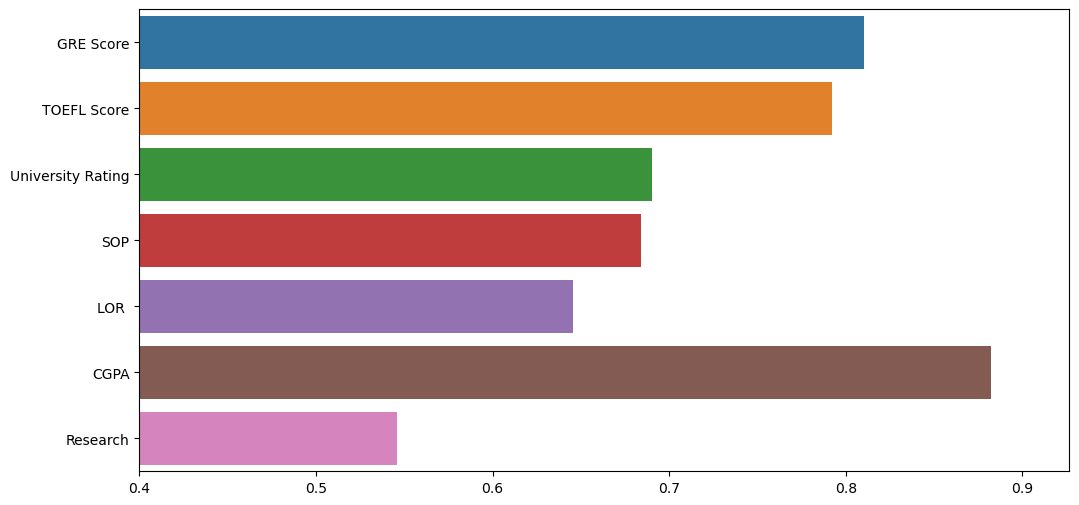

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(raw_df.drop("Serial No.", axis=1).corr().iloc[-1])[:-1], y=list(raw_df.drop("Serial No.", axis=1).columns)[:-1], orient='h')
plt.xlim(0.4)

#### Inference:
- GRE, TOEFL Score and CGPA are highly correlated with the Target

# Data Preprocessing
- Missing data analysis
- Outlier Treatment if necessary
- Feature Engineering
- Feature Scaling

## Null and Outlier Analysis

In [29]:
raw_df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

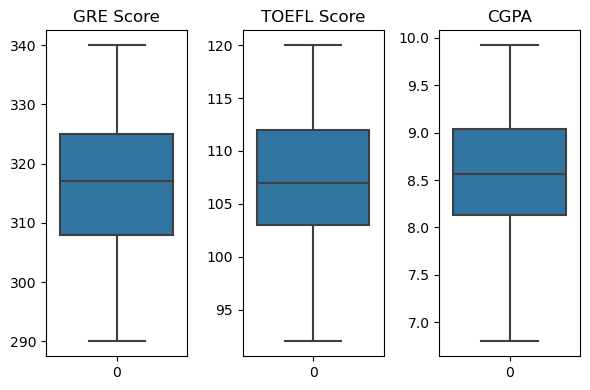

In [30]:
cnt = 1
plt.figure(figsize=(6,4))
for feature in num_features:
    plt.subplot(1, len(num_features), cnt)
    sns.boxplot(raw_df[feature])
    plt.title(feature)
    cnt += 1
plt.tight_layout()

#### Inference:
- No Null values are observed
- No outliers detected in numerical features

<Axes: ylabel='SOP'>

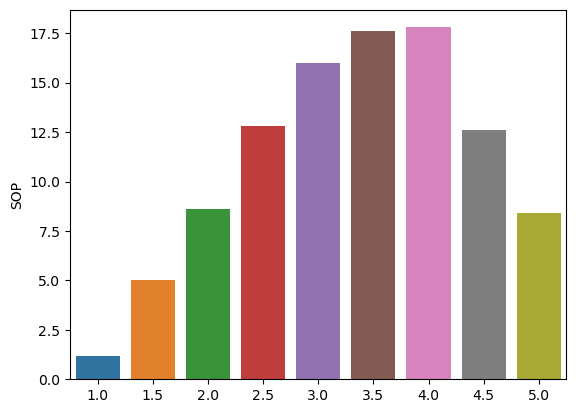

In [31]:
percent_split = (raw_df['SOP'].value_counts()*100/raw_df['SOP'].value_counts().sum()).sort_index()
sns.barplot(y = percent_split, x = percent_split.index)

<Axes: ylabel='LOR '>

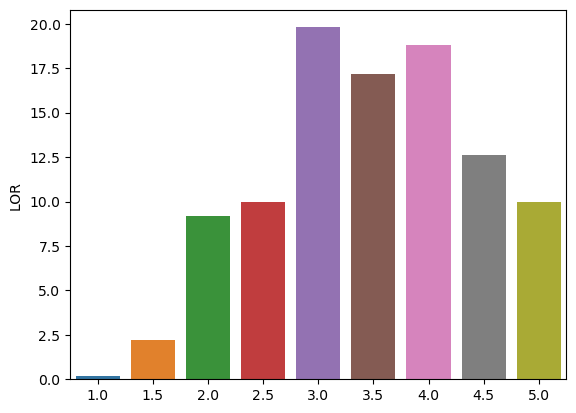

In [32]:
percent_split = (raw_df['LOR '].value_counts()*100/raw_df['LOR '].value_counts().sum()).sort_index()
sns.barplot(y = percent_split, x = percent_split.index)

<Axes: ylabel='University Rating'>

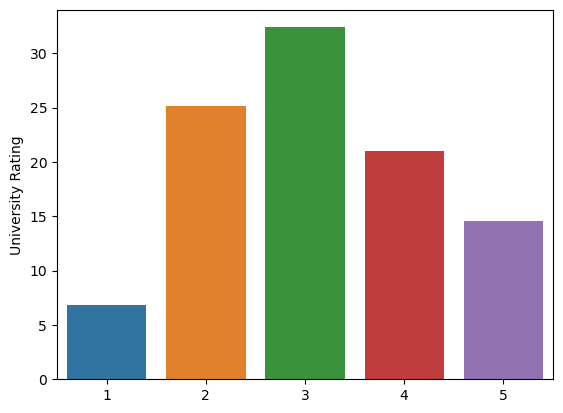

In [33]:
percent_split = (raw_df['University Rating'].value_counts()*100/raw_df['University Rating'].value_counts().sum()).sort_index()
sns.barplot(y = percent_split, x = percent_split.index)

In [34]:
percent_split

1     6.8
2    25.2
3    32.4
4    21.0
5    14.6
Name: University Rating, dtype: float64

#### Inference:
- SOP: 1, 1.5 and 2.0 can be merged, 4.5 and 5.0 can be merged 
- LOR: 1, 1.5, 2.0 and 2.5 can be merged, 4.5 and 5.0 can be merged 
- University Rating: 1 and 2 can be merged, 4 and 5 can be merged 

## Feature Engineering:
- Merge Categories
- PCA
- Feature Scaling

In [35]:
df.drop('Serial No.', axis=1, inplace=True)

In [36]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,UR_Binned,SOP_Binned,LOR_Binned
0,337,118,4,4.5,4.5,9.65,1,0.92,High,High,High
1,324,107,4,4.0,4.5,8.87,1,0.76,High,High,High
2,316,104,3,3.0,3.5,8.00,1,0.72,Average,Average,Average
3,322,110,3,3.5,2.5,8.67,1,0.80,Average,Average,Average
4,314,103,2,2.0,3.0,8.21,0,0.65,Low,Low,Average


In [37]:
def MapElements(df, feature):
    d = dict(map(lambda i, j: (i,j), sorted(df[feature].unique()), np.arange(1, len(df[feature].unique())+1)))
    return df[feature].map(d)

In [38]:
# Bin the elements
df['SOP'] = df['SOP'].apply(lambda x: 2 if x < 2 else (5 if x > 4 else x))
df['LOR '] = df['LOR '].apply(lambda x: 2 if x < 3 else (5 if x > 4 else x))
df['University Rating'] = df['University Rating'].apply(lambda x: 2 if x < 3 else (5 if x > 3 else x))

#Transform or Map the elements
df['SOP'] = MapElements(df, 'SOP')
df['LOR '] = MapElements(df, 'LOR ')
df['University Rating'] = MapElements(df, 'University Rating')

In [39]:
print("Unique values of SOP:", sorted(df['SOP'].unique()))
print("Unique values of LOR:", sorted(df['LOR '].unique()))
print("Unique values of University Rating:", sorted(df['University Rating'].unique()))

Unique values of SOP: [1, 2, 3, 4, 5, 6]
Unique values of LOR: [1, 2, 3, 4, 5]
Unique values of University Rating: [1, 2, 3]


#### Inference:
- University Rating, SOP, LOR are transformed to comparable ordinal data

In [40]:
## Principal Component Analysis

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [42]:
n = len(num_features) + len(cat_features)
pl = Pipeline([
    ('Scaling', StandardScaler()),
    ('PCA', PCA(n_components=n))
])

In [43]:
valid_col = num_features + cat_features
pl.fit(raw_df[valid_col])
pca_features = pl.transform(raw_df[valid_col])
pca_model = pl.named_steps['PCA']

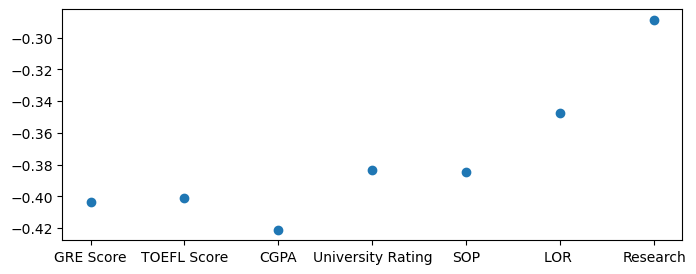

In [44]:
plt.figure(figsize=(8,3))
plt.plot(valid_col, pca_model.components_[0],'o')

#### Inference:
- The first principal component, which explains approximately 65% of the variance in the data, is constructed with nearly equal contributions from all features in the dataset
- Since all the features equally contribute for PC1, all are comparably important in explaining the variance of the dataset

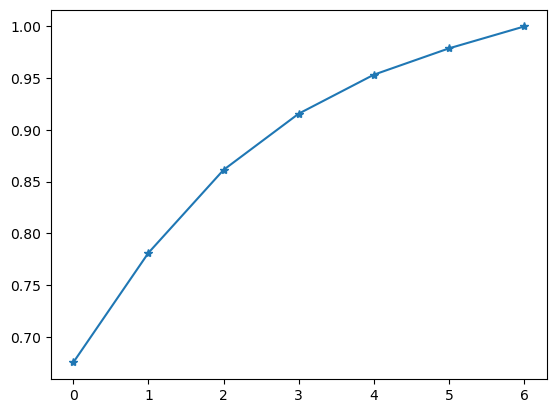

In [45]:
plt.plot(np.cumsum(pca_model.explained_variance_ratio_), marker="*")

#### Inference:
- Out of 7 features from the dataset, First 3 principal components captures >85% of variance in data
- Dimensionality reduction is possible with 4 pricipal components as it captures >95% of variance in data

Text(0, 0.5, 'Second Component')

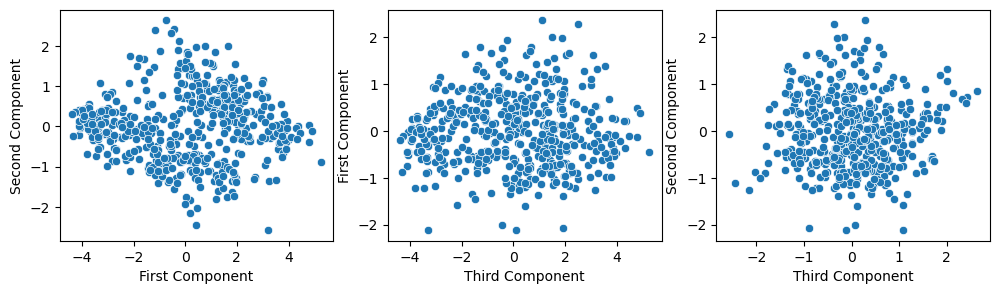

In [46]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.scatterplot(x = pca_features[:, 0], y=pca_features[:, 1])
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.subplot(1,3,2)
sns.scatterplot(x = pca_features[:, 0], y=pca_features[:, 2])
plt.xlabel("Third Component")
plt.ylabel("First Component")
plt.subplot(1,3,3)
sns.scatterplot(x = pca_features[:, 1], y=pca_features[:, 2])
plt.xlabel("Third Component")
plt.ylabel("Second Component")

# Assumptions of Linear Regression

In [47]:
#Pending

# Modeling
- Train Test Split and Feature Scaling
- Linear Regression
    - Performance Analysis using MAE, MSE and Adj R2 Score
- Polynomial Regression
    - KFold CV and Hyperparameter Tuning
- Lasso Regression
- Ridge Regression

## Data Preparation for Modeling

In [48]:
X = raw_df[num_features + cat_features]
Y = raw_df['Chance of Admit ']

In [49]:
scaler = StandardScaler()

In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=101, shuffle=True)
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)
ytrain.reset_index(drop=True, inplace=True)
ytest.reset_index(drop=True, inplace=True)

In [51]:
xtrain_scaled

array([[-1.60084289, -1.30312009, -1.80044641, ..., -1.85296909,
        -0.52155879, -1.11114215],
       [ 0.43113208,  0.65707309,  1.44698253, ...,  1.64791718,
         1.62367016,  0.89997486],
       [-0.01060161, -0.3230235 ,  0.27203337, ..., -0.35258926,
         0.01474845, -1.11114215],
       ...,
       [ 1.4029462 ,  1.80051911,  1.47962001, ...,  1.64791718,
         1.62367016,  0.89997486],
       [ 0.96121251,  0.65707309,  0.71263931, ...,  0.64766396,
         1.08736293,  0.89997486],
       [ 0.78451903,  0.49372366,  0.17412094, ...,  0.14753735,
         0.55105569,  0.89997486]])

In [52]:
xtrain

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
161,298,99,7.46,1,1.5,3.0,0
72,321,111,9.45,5,5.0,5.0,1
246,316,105,8.73,3,3.0,3.5,0
230,313,104,8.65,3,4.0,4.5,0
391,318,106,8.65,3,2.0,3.0,0
...,...,...,...,...,...,...,...
63,315,107,8.50,2,4.0,3.0,1
326,299,100,8.02,3,2.0,2.0,0
337,332,118,9.47,5,5.0,5.0,1
11,327,111,9.00,4,4.0,4.5,1


## Linear Regression

In [53]:
lir = LinearRegression()
lir.fit(xtrain_scaled, ytrain)

LinearRegression()

In [54]:
def adj_r2score(r2score, n, k):
    return (1-((1-r2score)*(n-1)/(n-k-1)))

In [55]:
def performance_analysis(ypred, ytrue, k=7):
    return [round(np.sqrt(mean_squared_error(ytrue, ypred)),3),\
            round(mean_absolute_error(ytrue, ypred),3),\
            round(r2_score(ytrue, ypred),3),\
            round(adj_r2score(r2_score(ytrue, ypred), len(ypred), k),3)]

In [56]:
train_score = performance_analysis(lir.predict(xtrain_scaled), ytrain, k=xtrain_scaled.shape[1])
test_score = performance_analysis(lir.predict(xtest_scaled), ytest, k=xtrain_scaled.shape[1])
lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
lir_res.head()

,MAE,RMSE,R2 Score,Adj R2 Score
Train,0.059,0.042,0.830,0.827
Test,0.061,0.044,0.777,0.760


#### Inference:
- MSE between test and train set is similar, hence there is no overfitting
- R2 score is not significant hence the performance of the model is average 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


<Axes: ylabel='Chance of Admit '>

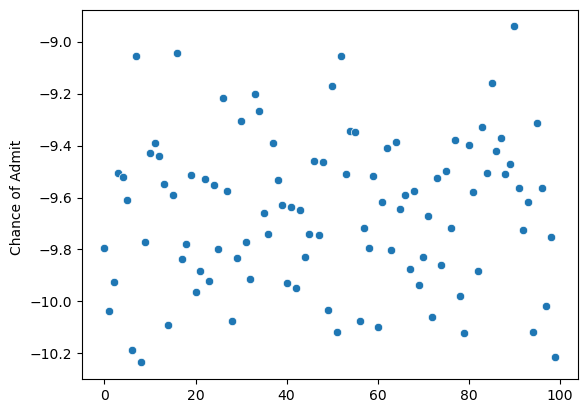

In [57]:
sns.scatterplot(x=np.arange(xtest.shape[0]), y=(ytest-lir.predict(xtest)))

<Axes: >

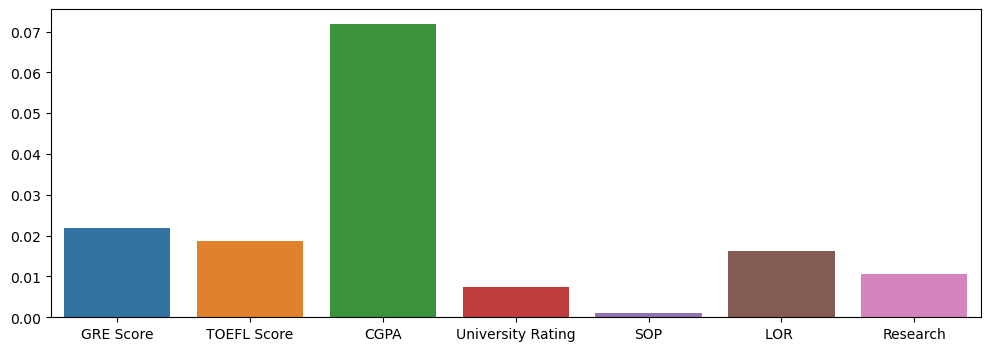

In [58]:
plt.figure(figsize=(12,4))
sns.barplot(x=list(xtrain.columns), y=lir.coef_)

#### Inference:
- GRE SCore, TOEFL Score, CGPA, LOR are given higher weightage indicating the significance of the features for the prediction
- Weightages of all the features are positive indicating the positive correlation

In [59]:
lir.intercept_

0.718075

In [60]:
xtrain_scaled.max(axis=0)

array([2.1097201 , 2.12721797, 2.21396324, 1.62040588, 1.64791718,
       1.62367016, 0.89997486])

## Polynomial Regression

In [61]:
def poly_reg(xtrain, ytrain, xtest, ytest):    
    poly_lir = LinearRegression()
    poly_lir.fit(xtrain, ytrain)
    train_score = performance_analysis(poly_lir.predict(xtrain), ytrain, k=xtrain.shape[1])
    test_score = performance_analysis(poly_lir.predict(xtest), ytest, k=xtest.shape[1])
    return train_score, test_score

In [62]:
poly_reg(xtrain, ytrain, xtest, ytest)
train_score, test_score= poly_reg(xtrain, ytrain, xtest, ytest)
poly_lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
poly_lir_res.head()

,MAE,RMSE,R2 Score,Adj R2 Score
Train,0.059,0.042,0.830,0.827
Test,0.061,0.044,0.777,0.760


In [63]:
# Apply Polynomial of degree 2
poly = PolynomialFeatures(degree=2)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.transform(xtest)

#Apply Scaling
ss = StandardScaler()
xtrain_poly_scaled = ss.fit_transform(xtrain_poly)
xtest_poly_scaled = ss.transform(xtest_poly)

train_score, test_score= poly_reg(xtrain_poly_scaled, ytrain, xtest_poly_scaled, ytest)
poly_lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
poly_lir_res.head()

,MAE,RMSE,R2 Score,Adj R2 Score
Train,0.056,0.039,0.848,0.833
Test,0.063,0.047,0.767,0.634


In [64]:
#Apply Scaling
ss = StandardScaler()
xtrain_scaled = ss.fit_transform(xtrain)
xtest_scaled = ss.transform(xtest)

# Apply Polynomial of degree 2
poly = PolynomialFeatures(degree=2)
xtrain_poly_scaled = poly.fit_transform(xtrain_scaled)
xtest_poly_scaled = poly.transform(xtest_scaled)

train_score, test_score= poly_reg(xtrain_poly_scaled, ytrain, xtest_poly_scaled, ytest)
poly_lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
poly_lir_res.head()

,MAE,RMSE,R2 Score,Adj R2 Score
Train,0.056,0.039,0.848,0.833
Test,0.063,0.047,0.767,0.634


#### Inference:
- Slight improvement in RMSE with respect to linear regression
- R2 score is almost same, no improvement in the performance is evident
- Increase degree of polynomial by hyperparameter tuning

### Hyperparameter Tuning: Degree of Polynomials

In [66]:
degrees = [3, 5, 7, 9]
kf = KFold(n_splits=5)
metric = []
for deg in [2]:
    poly = PolynomialFeatures(degree=deg)
    xtrain_poly = poly.fit_transform(xtrain_scaled)
    xtest_poly = poly.transform(xtest_scaled)    
    for train_index, val_index in kf.split(xtrain_poly, ytrain):
        xtrain_slice = xtrain_poly[train_index]
        ytrain_slice = ytrain[train_index]
        xval_slice = xtrain_poly[val_index]
        yval_slice = ytrain[val_index]
        train_score, val_score = poly_reg(xtrain_slice, ytrain_slice, xval_slice, yval_slice) 
        metric.append([train_score, val_score])

In [67]:
ytrain.reset_index(drop=True)

0      0.53
1      0.93
2      0.72
3      0.73
4      0.71
       ... 
395    0.56
396    0.63
397    0.94
398    0.84
399    0.73
Name: Chance of Admit , Length: 400, dtype: float64

## Ridge Regression

In [68]:
def ridge_reg(alp, xtrain, ytrain, xtest, ytest):
    rir = Ridge(alpha=alp)
    rir.fit(xtrain, ytrain)
    train_score = performance_analysis(rir.predict(xtrain), ytrain, k=xtrain.shape[1])
    test_score = performance_analysis(rir.predict(xtest), ytest, k=xtrain.shape[1])
    return train_score, test_score

In [69]:
train_score, test_score = ridge_reg(10, xtrain_scaled, ytrain, xtest_scaled, ytest)
lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
lir_res.head()

,MAE,RMSE,R2 Score,Adj R2 Score
Train,0.059,0.042,0.830,0.827
Test,0.061,0.044,0.776,0.759


### Hyperparameter Tuning: Regularization consant
- alpha = [0.01, 0.1, 1, 10, 100]

In [70]:
def kfold_cross_val(xtrain, ytrain, k, alpha):
    kf = KFold(n_splits=k)
    metric = []
    for train_index, val_index in kf.split(xtrain, ytrain):
        xtrain_slice = xtrain[train_index]
        ytrain_slice = ytrain[train_index]
        xval_slice = xtrain[val_index]
        yval_slice = ytrain[val_index]        
        train_score, val_score = ridge_reg(alpha, xtrain_slice, ytrain_slice, xval_slice, yval_slice) 
        metric.append([train_score, val_score])
    return metric

In [71]:
alpha_list = [0.01, 0.1, 1, 10, 100]
metric_cv = []
for alpha in alpha_list:
    metric = kfold_cross_val(xtrain_scaled, ytrain, 5, alpha)
    rir_res = pd.DataFrame(data=np.mean(metric, axis=0), columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
    print(bold_start + "Performance Results with alpha = " + str(alpha) + bold_end)
    print(rir_res)
    metric_cv.append(np.mean(metric, axis=0))

Performance Results with alpha = 0.01
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8058
Performance Results with alpha = 0.1
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8058
Performance Results with alpha = 1
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0430    0.8232        0.8062
Performance Results with alpha = 10
          MAE    RMSE  R2 Score  Adj R2 Score
Train  0.0592  0.0424    0.8302        0.8264
Test   0.0598  0.0432    0.8230        0.8060
Performance Results with alpha = 100
          MAE    RMSE  R2 Score  Adj R2 Score
Train  0.0614  0.0442    0.8174        0.8134
Test   0.0616  0.0448    0.8128        0.7946


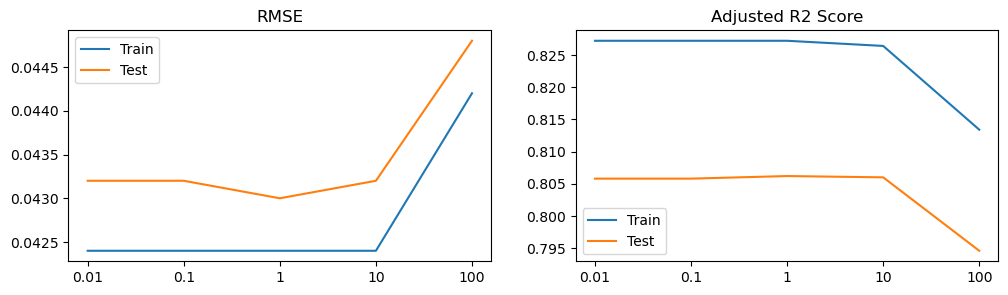

In [72]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.plot([str(i) for i in alpha_list], np.array(metric_cv)[:,0,1], label="Train")
plt.plot([str(i) for i in alpha_list], np.array(metric_cv)[:,1,1], label="Test")
plt.title('RMSE')
plt.legend()
plt.subplot(1,2,2)
plt.plot([str(i) for i in alpha_list], np.array(metric_cv)[:,0,3], label="Train")
plt.plot([str(i) for i in alpha_list], np.array(metric_cv)[:,1,3], label="Test")
plt.title('Adjusted R2 Score')
plt.legend()

#### Inference:
- No improvement in varying the regularization constant
- Increasing the regularization constant increases RMSE and decreases R2 score which is undesirable
- Ridge regression doesn't improve the performance of result

## LASSO Regression

In [73]:
def lasso_reg(alp, xtrain, ytrain, xtest, ytest):
    lir = Lasso(alpha=alp)
    lir.fit(xtrain, ytrain)
    train_score = performance_analysis(lir.predict(xtrain), ytrain, k=xtrain.shape[1])
    test_score = performance_analysis(lir.predict(xtest), ytest, k=xtrain.shape[1])
    return train_score, test_score

In [74]:
train_score, test_score = lasso_reg(10, xtrain_scaled, ytrain, xtest_scaled, ytest)
lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
lir_res.head()

,MAE,RMSE,R2 Score,Adj R2 Score
Train,0.143,0.116,0.00,-0.018
Test,0.131,0.105,-0.02,-0.098


### Hyperparameter Tuning: Regularization consant
- alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

In [75]:
def kfold_cross_val(xtrain, ytrain, k, alpha):
    kf = KFold(n_splits=k)
    metric = []
    for train_index, val_index in kf.split(xtrain, ytrain):
        xtrain_slice = xtrain[train_index]
        ytrain_slice = ytrain[train_index]
        xval_slice = xtrain[val_index]
        yval_slice = ytrain[val_index]        
        train_score, val_score = lasso_reg(alpha, xtrain_slice, ytrain_slice, xval_slice, yval_slice) 
        metric.append([train_score, val_score])
    return metric

In [76]:
alpha_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
metric_cv = []
for alpha in alpha_list:
    metric = kfold_cross_val(xtrain_scaled, ytrain, 5, alpha)
    lir_res = pd.DataFrame(data=np.mean(metric, axis=0), columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
    print(bold_start + "Performance Results with alpha = " + str(alpha) + bold_end)
    print(lir_res)
    metric_cv.append(np.mean(metric, axis=0))

Performance Results with alpha = 1e-05
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8058
Performance Results with alpha = 0.0001
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8062
Performance Results with alpha = 0.001
          MAE    RMSE  R2 Score  Adj R2 Score
Train  0.0592  0.0424    0.8310        0.8272
Test   0.0598  0.0432    0.8236        0.8064
Performance Results with alpha = 0.01
          MAE    RMSE  R2 Score  Adj R2 Score
Train  0.0604  0.0436    0.8230         0.819
Test   0.0608  0.0442    0.8178         0.800
Performance Results with alpha = 0.1
          MAE    RMSE  R2 Score  Adj R2 Score
Train  0.1200  0.0972    0.2998        0.2842
Test   0.1198  0.0972    0.2994        0.2316
Performance Results with alpha = 1
          MAE    RMSE  R2 Score  Adj R2 Score
Train  0.1434  0.1164     0.000       -0.0

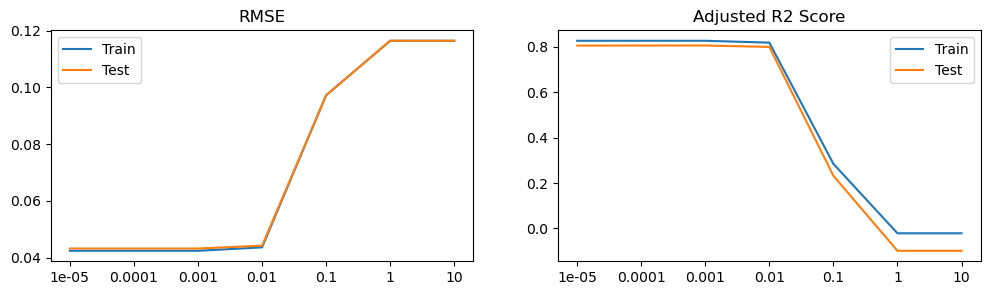

In [77]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.plot([str(i) for i in alpha_list], np.array(metric_cv)[:,0,1], label="Train")
plt.plot([str(i) for i in alpha_list], np.array(metric_cv)[:,1,1], label="Test")
plt.title('RMSE')
plt.legend()
plt.subplot(1,2,2)
plt.plot([str(i) for i in alpha_list], np.array(metric_cv)[:,0,3], label="Train")
plt.plot([str(i) for i in alpha_list], np.array(metric_cv)[:,1,3], label="Test")
plt.title('Adjusted R2 Score')
plt.legend()

In [78]:
print("Min RMSE:", np.round(min(np.array(metric_cv)[:,1,1]),2), "Reg Constant:",  alpha_list[np.argmin(np.array(metric_cv)[:,1,1])])
print("Max Adj R2 Score:",  max(np.array(metric_cv)[:,1,3]), "Reg Constant:",  alpha_list[np.argmax(np.array(metric_cv)[:,1,3])])

Min RMSE: 0.04 Reg Constant: 1e-05
Max Adj R2 Score: 0.8064 Reg Constant: 0.001


#### Inference:
- Significant improvement observed at very low regularization constant values <0.01
- Increasing the regularization constant tremendously increases RMSE and decreases R2 score
- Lasso regression shows some improvement in the r2 score compared to linear regression at alpha = 0.001

## Elastic Net Regression

In [79]:
def elastic_reg(alp, ratio, xtrain, ytrain, xtest, ytest):
    enr = ElasticNet(alpha=alp, l1_ratio=ratio)
    enr.fit(xtrain, ytrain)
    train_score = performance_analysis(enr.predict(xtrain), ytrain, k=xtrain.shape[1])
    test_score = performance_analysis(enr.predict(xtest), ytest, k=xtrain.shape[1])
    return train_score, test_score

In [80]:
train_score, test_score = elastic_reg(10, 1, xtrain_scaled, ytrain, xtest_scaled, ytest)
enr_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
enr_res.head()

,MAE,RMSE,R2 Score,Adj R2 Score
Train,0.143,0.116,0.00,-0.018
Test,0.131,0.105,-0.02,-0.098


### Hyperparameter Tuning:
- Alpha = [0.0001, 0.001, 0.01, 0.1, 1]
- l1 ratio = [0.01, 0.1, 0.5, 0.75, 1]

In [81]:
def kfold_cross_val_elas(xtrain, ytrain, k, alpha, ratio):
    kf = KFold(n_splits=k)
    metric = []
    for train_index, val_index in kf.split(xtrain, ytrain):
        xtrain_slice = xtrain[train_index]
        ytrain_slice = ytrain[train_index]
        xval_slice = xtrain[val_index]
        yval_slice = ytrain[val_index]        
        train_score, val_score = elastic_reg(alpha, ratio, xtrain_slice, ytrain_slice, xval_slice, yval_slice) 
        metric.append([train_score, val_score])
    return metric

In [82]:
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1]
ratio_list = [0.01, 0.1, 0.5, 0.75, 1]
metric_cv = []
for alpha in alpha_list:
    for ratio in ratio_list:
        metric = kfold_cross_val_elas(xtrain_scaled, ytrain, 5, alpha, ratio)
        enr_res = pd.DataFrame(data=np.mean(metric, axis=0), columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
        print(bold_start + "Performance Results with alpha = " + str(alpha) + ", l1 ratio = " + str(ratio) + bold_end)
        print(enr_res)
        metric_cv.append(np.mean(metric, axis=0))

Performance Results with alpha = 0.0001, l1 ratio = 0.01
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8058
Performance Results with alpha = 0.0001, l1 ratio = 0.1
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8058
Performance Results with alpha = 0.0001, l1 ratio = 0.5
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8062
Performance Results with alpha = 0.0001, l1 ratio = 0.75
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8062
Performance Results with alpha = 0.0001, l1 ratio = 1
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8062
Performance Results with alpha = 0.001, l1 ra

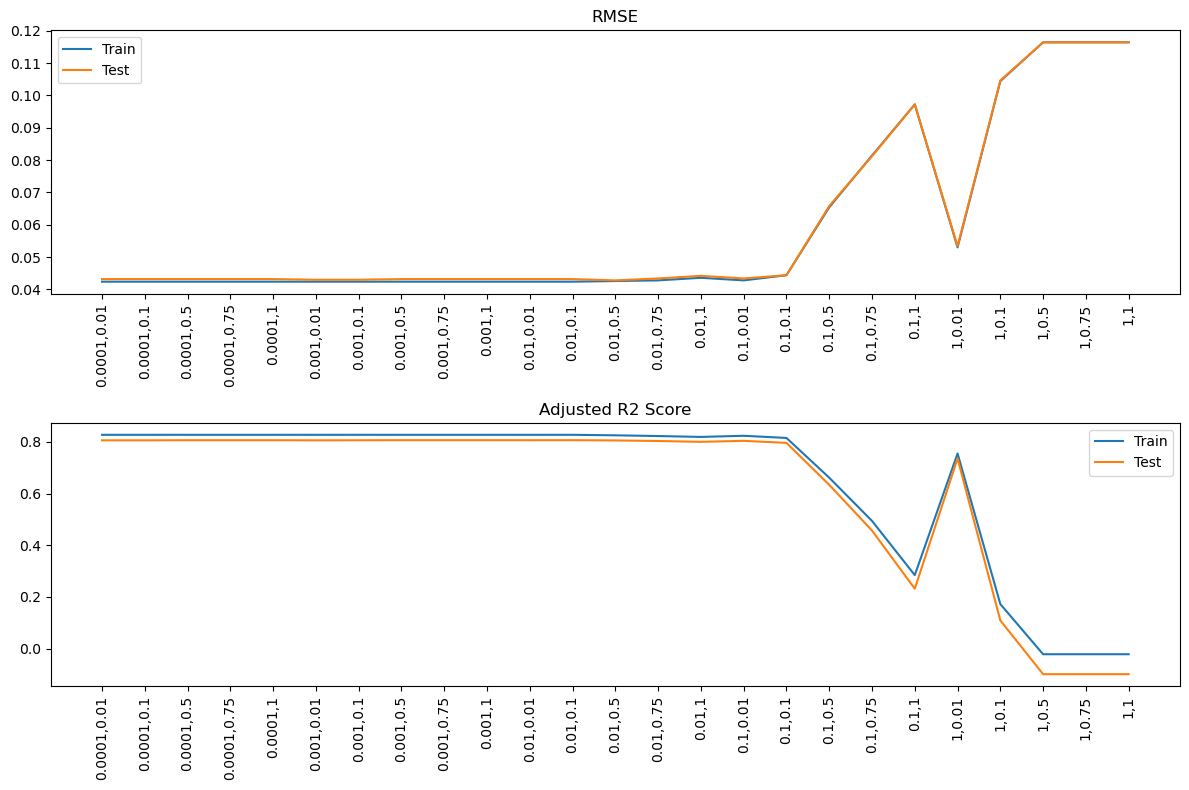

In [83]:
labels = [",".join([str(i),str(j)]) for i in alpha_list for j in ratio_list]
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(labels, np.array(metric_cv)[:,0,1], label="Train")
plt.plot(labels, np.array(metric_cv)[:,1,1], label="Test")
plt.title('RMSE')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(2,1,2)
plt.plot(labels, np.array(metric_cv)[:,0,3], label="Train")
plt.plot(labels, np.array(metric_cv)[:,1,3], label="Test")
plt.title('Adjusted R2 Score')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

In [84]:
print("Min RMSE:", np.round(min(np.array(metric_cv)[:,1,1]),2), "Max R2 Score:",  max(np.array(metric_cv)[:,1,3]))

Min RMSE: 0.04 Max R2 Score: 0.8064


In [85]:
print("Min RMSE:", np.round(min(np.array(metric_cv)[:,1,1]),2), "Reg Constant:",  labels[np.argmin(np.array(metric_cv)[:,1,1])].split(","))
print("Max Adj R2 Score:",  max(np.array(metric_cv)[:,1,3]), "Reg Constant:",  labels[np.argmax(np.array(metric_cv)[:,1,3])].split(","))

Min RMSE: 0.04 Reg Constant: ['0.01', '0.5']
Max Adj R2 Score: 0.8064 Reg Constant: ['0.001', '0.5']


#### Inference:
- Significant improvement observed at very low regularization alpha values <0.01 and ratio = 0.5
- Increasing the alpha tremendously increases RMSE and decreases R2 score
- Elastic net regression shows similar improvement as that of lasso regression at alpha in range 0.01 - 0.001 and l1_ratio = 0.5

# Assumptions of Linear Regression
- Multicollinearity Analysis
- Residual plot Analysis
- Linearity of variables
- Test for Homoscedasticity
- Normality of residuals

## Multicollinearity Analysis

In [86]:
VIF = [variance_inflation_factor(xtrain, i) for i in range(len(xtrain.columns))]
print([(list(xtrain.columns)[i],  VIF[i]) for i in range(len(xtrain.columns))])

[('GRE Score', 1320.463129851432), ('TOEFL Score', 1224.5392331156734), ('CGPA', 921.83366405054), ('University Rating', 21.819465877411755), ('SOP', 35.23376460964398), ('LOR ', 31.442054746602892), ('Research', 2.7925969690879637)]


<Axes: >

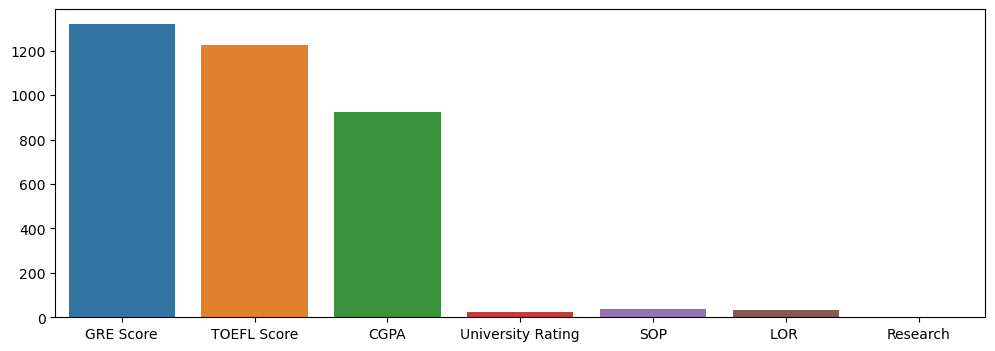

In [87]:
plt.figure(figsize=(12,4))
sns.barplot(x=list(xtrain.columns), y = VIF)

#### Inference:
- GRE, TOEFL Score and CGPA having very high VIF value indicating the high linear dependency of the features

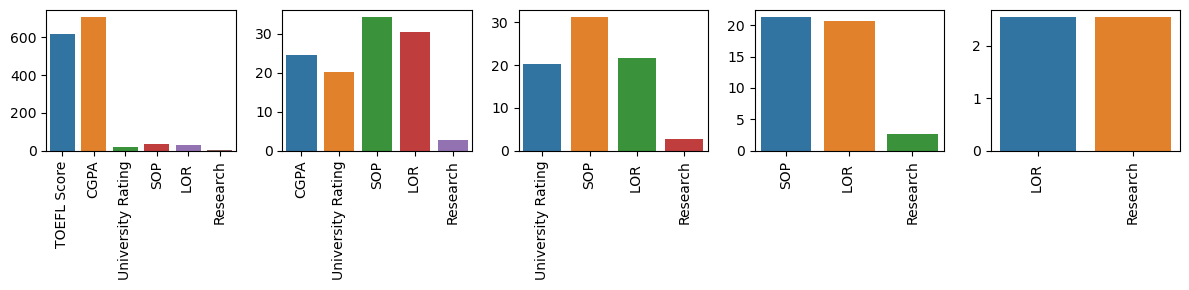

In [115]:
xtrain_new = xtrain.copy()
cols = list(xtrain_new.columns)
plt.figure(figsize=(12,3))
for i in range(len(cols)-2):
    xtrain_new.drop(cols[i], axis=1, inplace= True)
    plt.subplot(1,5,i+1)
    VIF = [variance_inflation_factor(xtrain_new, i) for i in range(len(xtrain_new.columns))]
    #print([(list(xtrain_new.columns)[i],  VIF[i]) for i in range(len(xtrain_new.columns))])
    sns.barplot(x=list(xtrain_new.columns), y = VIF)
    plt.xticks(rotation=90)
plt.tight_layout()

#### Inference:
- Without GRE Score, VIF is not changed significantly for other features
- Without GRE and TOEFL Score, VIF is drastically reduced for CGPA indicating the dependency of the 3 features
- Removing University rating and SOP, VIF of LOR is drastically reducted indicating the dependency of the 3 features
- Except research, all other features are having linear dependency with other features

In [89]:
xtrain_new = xtrain.copy()
xtest_new = xtest.copy()
cols = list(xtrain_new.columns)

for i in range(len(cols)-1): 
    xtrain_new.drop(cols[i], axis=1, inplace= True)
    xtest_new.drop(cols[i], axis=1, inplace= True)
    ss = StandardScaler()    
    lir = LinearRegression()
    lir.fit(ss.fit_transform(xtrain_new), ytrain)
    train_score = performance_analysis(lir.predict(ss.transform(xtrain_new)), ytrain, k=xtrain_new.shape[1])
    test_score = performance_analysis(lir.predict(ss.transform(xtest_new)), ytest, k=xtrain_new.shape[1])
    lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
    print(bold_start + "Performance of Linear Regression without " + cols[i] + ":" + bold_end)
    print(lir_res)
    

Performance of Linear Regression without GRE Score:
         MAE   RMSE  R2 Score  Adj R2 Score
Train  0.060  0.044     0.825         0.822
Test   0.062  0.045     0.773         0.758
Performance of Linear Regression without TOEFL Score:
         MAE   RMSE  R2 Score  Adj R2 Score
Train  0.062  0.045     0.812         0.810
Test   0.062  0.046     0.770         0.758
Performance of Linear Regression without CGPA:
         MAE   RMSE  R2 Score  Adj R2 Score
Train  0.085  0.065     0.647         0.643
Test   0.088  0.068     0.544         0.525
Performance of Linear Regression without University Rating:
         MAE   RMSE  R2 Score  Adj R2 Score
Train  0.090  0.068     0.609         0.606
Test   0.088  0.069     0.541         0.526
Performance of Linear Regression without SOP:
         MAE   RMSE  R2 Score  Adj R2 Score
Train  0.097  0.077     0.544         0.542
Test   0.099  0.080     0.416         0.404
Performance of Linear Regression without LOR :
         MAE   RMSE  R2 Score  Adj

#### Inference:
- Removing collinear features doesn't improve the performance but slightly reducing the performance

## Linearity Analysis

In [90]:
raw_df.corr().iloc[1:-1,-1]

GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Name: Chance of Admit , dtype: float64

## Residual Plot Analysis

Text(0.5, 1.0, 'Residual Plot: Test Set')

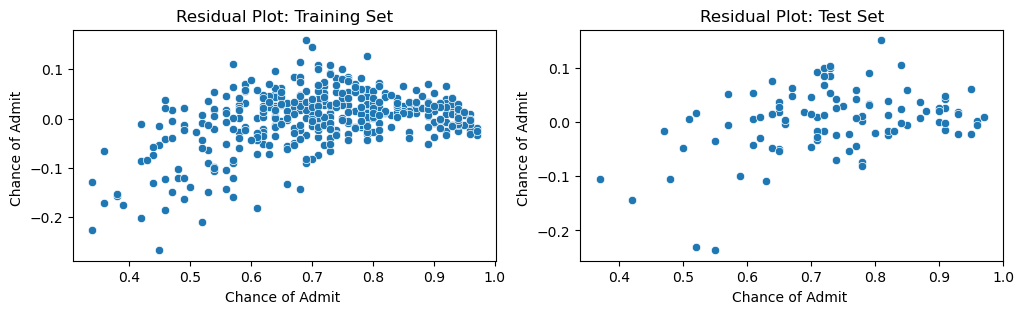

In [93]:
lir = LinearRegression()
lir.fit(xtrain_scaled, ytrain)
ypred = lir.predict(xtrain_scaled)
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.scatterplot(x=ytrain, y = ytrain - lir.predict(xtrain_scaled))
plt.title('Residual Plot: Training Set')
plt.subplot(1,2,2)
sns.scatterplot(x=ytest, y = ytest - lir.predict(xtest_scaled))
plt.title('Residual Plot: Test Set')

#### Inference:
- All the features have high correlation with Target variable  
- A clear curvature in the residuals indicates non-linearity
- Non linear models is required to capture the non linearity in the data

## Normality of Residuals

In [100]:
#Side By Side Plot
def hist_box_plot(data, title):
    plt.figure(figsize=(12,3))
    plt.suptitle(title)
    plt.subplot(1,2,1)
    sns.histplot(data, kde=True, bins=20)
    plt.subplot(1,2,2)
    sns.boxplot(data)
    plt.xlabel('Residuals')

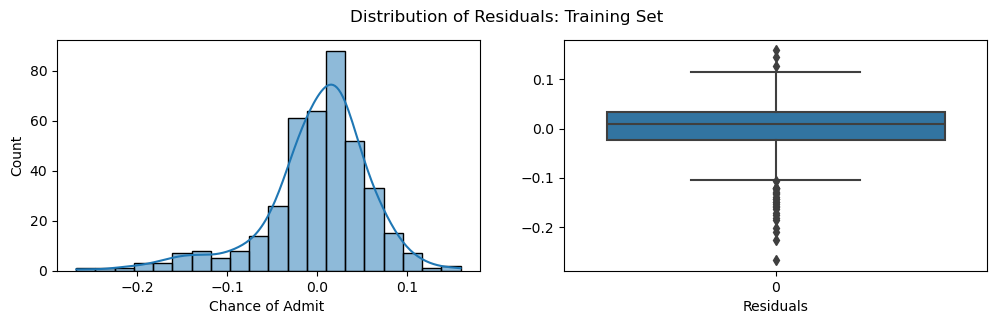

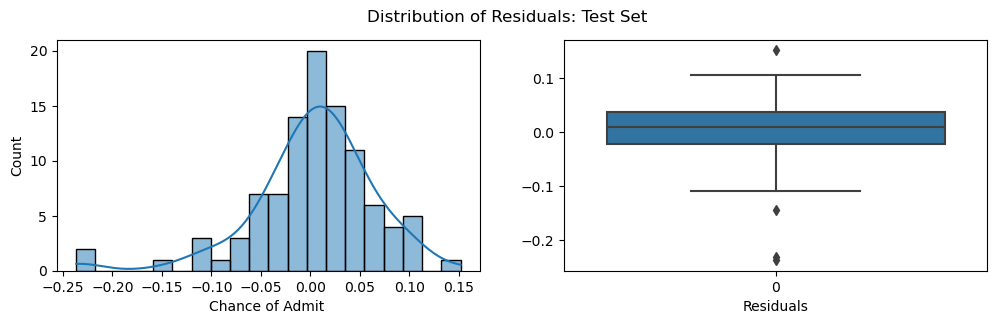

In [101]:
hist_box_plot(ytrain - lir.predict(xtrain_scaled), 'Distribution of Residuals: Training Set')
hist_box_plot(ytest - lir.predict(xtest_scaled), 'Distribution of Residuals: Test Set')

#### Inference:
- Residual is almost normally distributed with slight skew
- It satisfies the assumption of linear regression the normal distribution of residuals 

# Statistical Tests
- ANOVA Test

## ANOVA Test

# Insights

# Recommendations